## 2. Machine Learning for Regression


In [50]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

In [51]:
df = pd.read_csv(r"../housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2.3 Exploratory data analysis

Distribution of medain house value

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

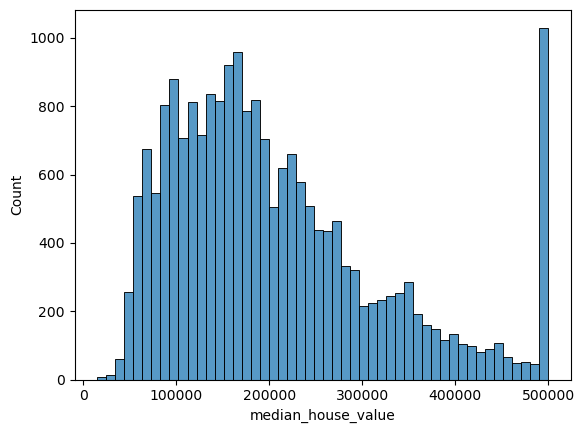

In [53]:
sns.histplot(df.median_house_value, bins=50)

<Axes: xlabel='median_house_value', ylabel='Count'>

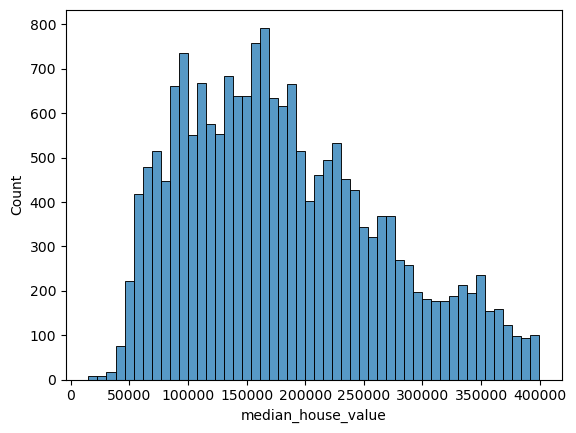

In [54]:
sns.histplot(df.median_house_value[df.median_house_value < 400000], bins=50)

In [55]:
new_df = df[
    (df.ocean_proximity == "<1H OCEAN") |
    (df.ocean_proximity == "INLAND")
    ][[
       'latitude',
        'longitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income',
        'median_house_value' 
    ]].reset_index(drop=True)
new_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


Missing values

In [56]:
new_df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [57]:
new_df.describe(include='all')

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2.4 Setting up the validation framework

Prepare and split the dataset

In [58]:
n = len(new_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [59]:
n

15687

In [60]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [61]:
idx = np.arange(n)

In [62]:
np.random.seed(42)
idx2 = idx.copy()
np.random.shuffle(idx2)

In [63]:
df_train = new_df.iloc[idx2[:n_train]]
df_val = new_df.iloc[idx2[n_train:n_train+n_val]]
df_test = new_df.iloc[idx2[n_train+n_val:]]

In [64]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15183,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
4469,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
9316,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
4983,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
13154,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [65]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [66]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [67]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [68]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [69]:
len(y_train)

9413

## 2.7 Training a linear regression model

In [70]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

## 2.9 RMSE

In [71]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

## 2.10 Validating the model

In [108]:
def prepare_X(df, mean_value = None) -> np.ndarray:
    if mean_value:
        df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_value)   
    else:
        df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
    X = df.values
    return X

In [109]:
mean_value = df_train['total_bedrooms'].mean()

In [110]:
# filling with zeros
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2) 

0.33

<Axes: ylabel='Count'>

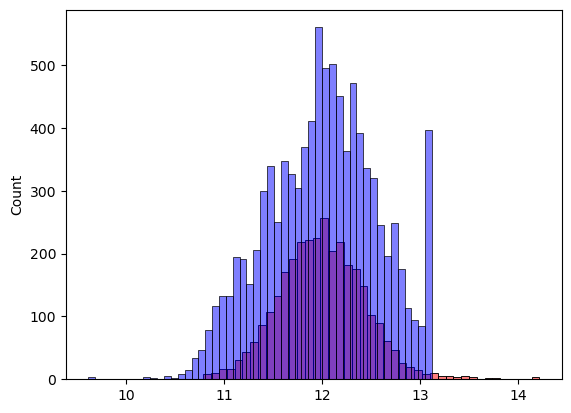

In [111]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [112]:
X_train = prepare_X(df_train, mean_value)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, mean_value)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
round(score, 2)

0.33

<Axes: ylabel='Count'>

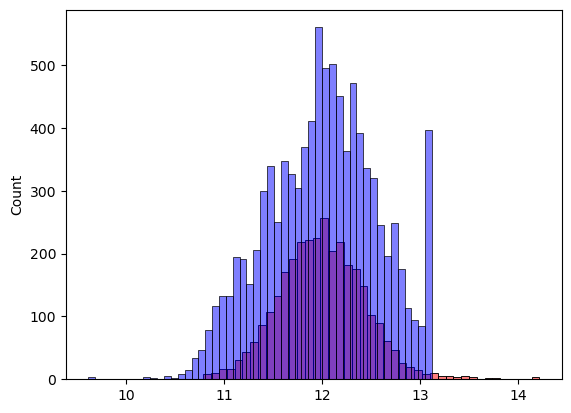

In [113]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


In [77]:
w0, w

(-9.763249477872748,
 array([-2.68233309e-01, -2.55938802e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

## 2.13 Regularization

In [78]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [79]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34087793005183514

<Axes: ylabel='Count'>

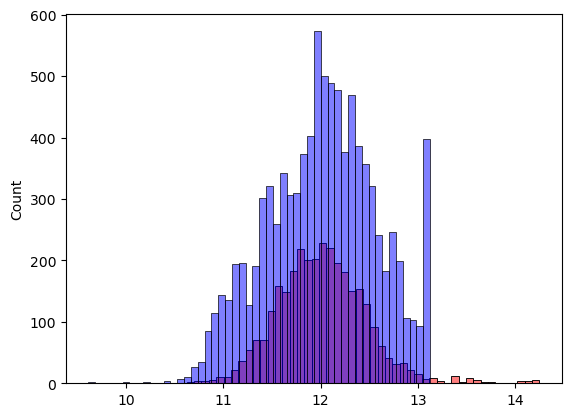

In [80]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


## 2.14 Tuning the model

In [81]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    score = round(score, 2)
    print(r, w0, score)

0 -9.763249477872748 0.34
1e-06 -9.763228831185938 0.34
0.0001 -9.761185235784438 0.34
0.001 -9.742646249655227 0.34
0.01 -9.561056193322294 0.34
0.1 -8.05888976960835 0.34
1 -3.1331542784379587 0.34
5 -0.8410867975175995 0.35
10 -0.43811723159850513 0.35


In [82]:
r = 0
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.3408479034141573

<Axes: ylabel='Count'>

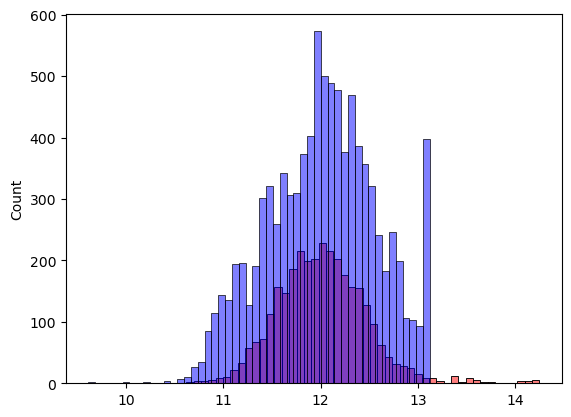

In [83]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


In [84]:
stat = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx2 = idx.copy()
    np.random.seed(s)
    np.random.shuffle(idx2)
    df_train = new_df.iloc[idx2[:n_train]].reset_index(drop=True)
    df_val = new_df.iloc[idx2[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = new_df.iloc[idx2[n_train+n_val:]].reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    stat.append(score)

standard = np.array(stat).std()
round(standard, 3)
    

0.005

## 2.15 Using the model

In [85]:
np.random.seed(9)
idx2 = idx.copy()
np.random.shuffle(idx2)
df_train = new_df.iloc[idx2[:n_train]].reset_index(drop=True)
df_val = new_df.iloc[idx2[n_train:n_train+n_val]].reset_index(drop=True)
df_test = new_df.iloc[idx2[n_train+n_val:]].reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [86]:
df_full_train = pd.concat([df_train, df_val])

In [87]:
df_full_train = df_full_train.reset_index(drop=True)

In [88]:
X_full_train = prepare_X(df_full_train)

In [89]:
X_full_train

array([[  32.82  , -117.05  ,   16.    , ..., 1684.    ,  701.    ,
           4.2312],
       [  33.91  , -118.    ,   19.    , ..., 2374.    ,  753.    ,
           5.979 ],
       [  37.25  , -121.96  ,   35.    , ...,  484.    ,  174.    ,
           6.1648],
       ...,
       [  32.85  , -116.99  ,   32.    , ..., 3025.    ,  948.    ,
           4.0931],
       [  38.48  , -122.68  ,   15.    , ...,  716.    ,  259.    ,
           5.3409],
       [  37.29  , -121.95  ,   30.    , ..., 1834.    ,  824.    ,
           3.4505]])

In [90]:
y_full_train = np.concatenate([y_train, y_val])

In [91]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [92]:
w0

-9.724839217482138

In [93]:
w

array([-2.68080162e-01, -2.55541948e-01,  1.73222785e-03, -3.39654801e-05,
        2.84921074e-04, -1.50329048e-04,  3.98733007e-04,  1.81391701e-01])

In [94]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.33498993366108754

<Axes: ylabel='Count'>

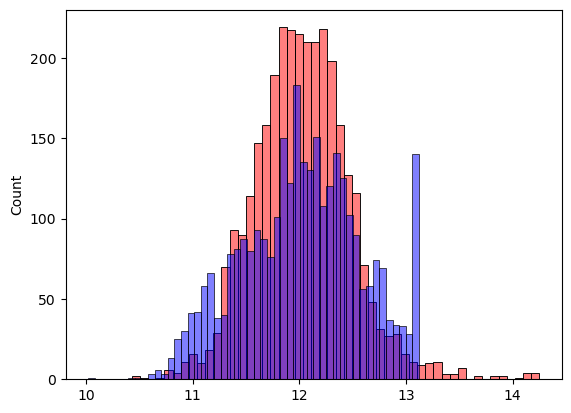

In [95]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_test, color='blue', alpha=0.5, bins=50)
